# Text Clustering

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./text_to_cluster.txt', sep='::', header=None)
df

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack
...,...
679,Detecting and Responding to Ransomware
680,"Emotet malware is back, more dangerous than ever"
681,Hosting provider SmarterASP.NET hit by ransomw...
682,Ransomware as a Service (RaaS) – A Contemporar...


In [3]:
# df.drop_duplicates(keep='first', inplace=True)
df

,0
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack
...,...
679,Detecting and Responding to Ransomware
680,"Emotet malware is back, more dangerous than ever"
681,Hosting provider SmarterASP.NET hit by ransomw...
682,Ransomware as a Service (RaaS) – A Contemporar...


In [6]:
document = list(df[0].values)
document

["Ransomware attack at Mexico's Pemex halts work, threatens to cripple computers",
 '#city | #ransomware | Ransomware Attack At Mexico’s Pemex Halts Work, Threatens To Cripple Computers',
 "Mexico's Pemex Oil Suffers Ransomware Attack, $4.9 Million Demanded",
 'A Mexican oil company was hit by ransomware attack',
 'Pemex Struck by Ransomware Attack',
 'Mexico’s Pemex Said It Quickly Neutralized Digital Attack',
 'Ransomware attack hits Mexican state oil firm Pemex',
 'Ransomware Attack at Mexican State Oil Firm Halts Work, Threatens to Cripple Computers – GetAps.site',
 'Mexican state oil firm Pemex hit by ransomware attack',
 'Ransomware attack on the Mexican oil giant Pemex',
 "Ransomware attack at Mexico's Pemex halts work, threatens to cripple computers By Reuters",
 "Ransomware Attack Hits Mexico's State Oil Firm Pemex",
 'Spain’s Largest Radio Station Under Siege By Bitcoin Ransomware Attack',
 'Ransomware Attack Hits Web Hosting Provider SmarterASP',
 'ASP.NET hosting provider r

In [7]:
len(document)

684

In [8]:
from nltk import WordNetLemmatizer, PorterStemmer
import nltk
from nltk.corpus import stopwords
import re
# nltk.download("stopwords")

def cleanText(data):
    """
    Clean Text
    - Keep only letters
    - Remove stopwords
    - Stem words
    """
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    text = re.sub('[^a-zA-Z]', ' ', data)
    words = nltk.word_tokenize(text.lower())
    stops = set(stopwords.words('english'))
    #lem_words = [lemmatizer.lemmatize(w) for w in words if w not in stops]
    lem_words = [stemmer.stem(w) for w in words if w not in stops]
    return ' '.join(lem_words)

In [9]:
X_clean = []
for i in range(len(document)):
    X_clean.append(cleanText(document[i]))
X_clean

['ransomwar attack mexico pemex halt work threaten crippl comput',
 'citi ransomwar ransomwar attack mexico pemex halt work threaten crippl comput',
 'mexico pemex oil suffer ransomwar attack million demand',
 'mexican oil compani hit ransomwar attack',
 'pemex struck ransomwar attack',
 'mexico pemex said quickli neutral digit attack',
 'ransomwar attack hit mexican state oil firm pemex',
 'ransomwar attack mexican state oil firm halt work threaten crippl comput getap site',
 'mexican state oil firm pemex hit ransomwar attack',
 'ransomwar attack mexican oil giant pemex',
 'ransomwar attack mexico pemex halt work threaten crippl comput reuter',
 'ransomwar attack hit mexico state oil firm pemex',
 'spain largest radio station sieg bitcoin ransomwar attack',
 'ransomwar attack hit web host provid smarterasp',
 'asp net host provid recov ransomwar attack',
 'host provid smarterasp net recov ransomwar attack',
 'smarterasp net host network crippl ransomwar attack',
 'ransomwar attack dow

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_clean)

In [11]:
terms = vectorizer.get_feature_names()
len(terms)

831

In [12]:
terms

['abil',
 'abort',
 'abus',
 'academ',
 'access',
 'acsc',
 'activ',
 'actor',
 'actual',
 'ad',
 'add',
 'adob',
 'advanc',
 'advic',
 'advis',
 'affair',
 'affect',
 'africa',
 'agenc',
 'ahead',
 'ai',
 'aim',
 'alert',
 'allow',
 'alter',
 'altern',
 'alyssa',
 'amandacerni',
 'amazon',
 'amd',
 'amid',
 'analysi',
 'android',
 'anoth',
 'anti',
 'antiviru',
 'aol',
 'api',
 'apolog',
 'app',
 'appl',
 'apt',
 'arbitrari',
 'arizona',
 'arriv',
 'asean',
 'asia',
 'ask',
 'asp',
 'assault',
 'asset',
 'asu',
 'asynchron',
 'atm',
 'attach',
 'attack',
 'attempt',
 'attract',
 'august',
 'aussi',
 'australian',
 'authent',
 'autumn',
 'av',
 'avast',
 'averag',
 'avoid',
 'axiom',
 'backdoor',
 'backslid',
 'backup',
 'bad',
 'bait',
 'bank',
 'beat',
 'becker',
 'begin',
 'believ',
 'belong',
 'berhad',
 'best',
 'beta',
 'bewar',
 'biggest',
 'billabong',
 'bitcoin',
 'bitdefend',
 'bite',
 'bitmex',
 'black',
 'blackberri',
 'blue',
 'bluekeep',
 'boardrid',
 'boost',
 'botch',
 

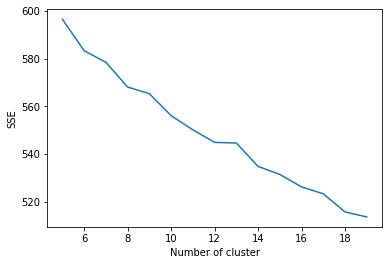

In [13]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

sse = {}
for k in range(5, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    clusters = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
k = 12

model = KMeans(n_clusters=k)
clusters = model.fit_predict(X)
clusters

array([ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,
        1,  4, 10,  4,  1,  1,  1, 10,  1,  1,  4,  4,  1,  8,  4,  1, 10,
        1,  4,  6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  8, 10, 10, 10,
        9, 10,  3,  4,  3,  3,  8,  3,  3,  3,  3,  3,  8,  3,  8,  3,  4,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3, 10, 10, 10,  3,  3,  8,  6,  4,  6,  6,  6,  6,  4,  6, 10,
       10, 10, 10, 10, 10, 10, 10,  8, 10, 10, 10,  9, 10,  8,  3,  3,  3,
        3,  3,  3,  3, 10,  6,  4,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  5,  6,  8,  9,  7,  7,  7,  7,  7,  2,  2,  2,  2,  2,  2,
        2,  8,  8,  7,  6, 10,  7,  5,  4,  8,  8,  7,  7,  7,  7,  8,  6,
       10,  5,  4,  8,  8,  8,  8,  8,  8,  5,  5,  2,  2,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  5,  5,
        5,  5,  5, 10,  5,  5,  5,  5,  5,  4,  5,  1,  4,  5,  5,  1,  5,
        5,  5,  5,  5,  5

In [ ]:
from sklearn.cluster import Birch

model = Birch()
cluster = model.fit_predict(X)
clusters

In [15]:
df['cluster'] = clusters

In [16]:
df = df.sort_values('cluster')
df

,0,cluster
0,Ransomware attack at Mexico's Pemex halts work...,0
610,Mexican Oil Company Pemex Hit by Ransomware,0
609,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",0
300,Hackers Demand $5 Million from Mexico's Pemex ...,0
301,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",0
...,...,...
542,Ransomware as a Service (RaaS) – A Contemporar...,11
265,Ransomware as a Service (RaaS) – A Contemporar...,11
682,Ransomware as a Service (RaaS) – A Contemporar...,11
338,Ransomware as a Service (RaaS) – A Contemporar...,11


In [17]:
print(df[df['cluster']==0][0])

0      Ransomware attack at Mexico's Pemex halts work...
610          Mexican Oil Company Pemex Hit by Ransomware
609    Mexico's Pemex Oil Suffers Ransomware Attack, ...
300    Hackers Demand $5 Million from Mexico's Pemex ...
301    Mexico's Pemex Oil Suffers Ransomware Attack, ...
302    Mexico’s Pemex Oil Suffers Ransomware Attack, ...
303    Ransomware attack at mexicos pemex halts work ...
304    Ransomware Attack at Mexican State Oil Firm Ha...
305    A Mexican oil company was hit by ransomware at...
307    Mexican state oil company Pemex hit by means o...
308                    Pemex Struck by Ransomware Attack
309    Ransomware attack hits Mexican state oil firm ...
310    Ransomware Attack at Mexican State Oil Firm Ha...
311    Ransomware Attack Hits Mexico's State Oil Firm...
312          Mexican Oil Company Pemex Hit by Ransomware
313    Mexican state oil firm Pemex hit by ransomware...
611    Mexico’s Pemex oil provider says attempted hac...
314     Ransomware attack on th

In [18]:
print(df[df['cluster']==1][0])

244    Leading ASP.NET host crippled by ransomware at...
248    Hosting provider SmarterASP.NET hit by ransomw...
245    Ransomware attack knocks SmarterASP.net custom...
246    Expert Advise: SmarterASP.NET Infected By Rans...
249    SmarterASP.NET is Struck by Ransomware Which E...
255           ASP.NET hosting provider hit by ransomware
251    Popular ASP.NET Hosting Provider Recovers Afte...
252       Hoster SmarterASP.NET Taken Down by Ransomware
253    SmarterASP.NET - ASP.NET Hosting Provider Hit ...
254    Major ASP.NET hosting provider SmarterASP hit ...
243          Major US Hosting Provider Hit by Ransomware
461    Ransomware Attack Downs Hosting Service Smarte...
250    Major ASP.NET hosting provider infected by ran...
241    ASP.NET Service Provider SmartASP.net Targeted...
235    Hosting Provider SmarterASP.NET Recovering Fro...
239    SmarterASP.net customers knocked offline due t...
238    Ransomware Attack Downs Hosting Service Smarte...
237    SmarterASP.NET, a web ho

In [19]:
print(df[df['cluster']==2][0])

441    New ransomware as a service offered at deep di...
444        Buran ransomware is being sold for a discount
401    Counterterrorism expert: Small healthcare comp...
522    New Ransomware-as-a-Service Undercuts Competit...
371    PureLocker: New Ransomware-as-a-Service Being ...
370    New PureLocker Ransomware Linked to MaaS Provi...
442    New Buran Ransomware EnCrypt All Version of Wi...
443    Buran ransomware-as-a-service continues to imp...
293       ‘Buran’ new ransomware evolved from VegaLocker
583    New ransomware as a service offered at deep di...
446    RaaS – Hackers Selling Buran Ransomware in Rus...
447    New Buran ransomware-as-a-service tempts crimi...
448    New Ransomware-as-a-Service Undercuts Competit...
182    PureLocker: New Ransomware-as-a-Service Being ...
181    New PureLocker Ransomware Linked to MaaS Provi...
153    Buran: New ransomware attracts competitors thr...
152    New Buran ransomware-as-a-service tempts crimi...
151       ‘Buran’ new ransomwar

In [20]:
print(df[df['cluster']==5][0])

599       Can Your SMB Stand Up to Petya 2.0 Ransomware?
330    Solution To Remove Amandacerny89@aol.com.VIRUS...
331    Delete MOSK ransomware from Windows XP : Effac...
179    PureLocker Ransomware Can Lock Files on Window...
180    PureLocker Ransomware Can Be Ported To Windows...
                             ...                        
263                        How to remove STOP Ransomware
264          Uninstall Cyborg Ransomware from Windows 10
262    Delete MOSK ransomware from Windows XP : Effac...
261    Solution To Remove Amandacerny89@aol.com.VIRUS...
211              What SMBs NEED to know about ransomware
Name: 0, Length: 104, dtype: object


In [21]:
print(df[df['cluster']==8][0])

626         Revenge is a Dish Best Served... Obfuscated?
627    Silobreaker Daily Cyber Digest – 11 November 2019
647    Cyber Command flags North Korean-linked hacker...
628    Security Affairs newsletter Round 239 – Hackad...
661    7 Effective Cybersecurity Tips for Black Frida...
                             ...                        
363                         Dont bite that phishing hook
375    Titanium APT Hackers Inject New Hidden Backdoo...
364                                    my phishing game.
367    Global Spear Phishing Market Demand Analysis B...
368    Bitdefender GravityZone enhanced with new endp...
Name: 0, Length: 92, dtype: object


In [22]:
print(df[df['cluster']==9][0])

228    ConnectWise warns customers of ongoing ransomw...
551     TA-505 Cybercrime on System Integrator Companies
113    Arizona dental insurance company warns custome...
141    Magento Users Warned of Remote Code Execution ...
51     Arizona dental insurance company warns custome...
641    TA505 Cybercrime targets system integrator com...
290    ConnectWise warns customers of ongoing ransomw...
389    Magento Users Warned of Remote Code Execution ...
644     TA-505 Cybercrime on System Integrator Companies
552    TA505 Cybercrime targets system integrator com...
Name: 0, dtype: object


In [23]:
with open('birch.txt', 'w+') as file:
    for i in range(max(clusters)+1):
        file.write(f'cluster_id:{i}\n')
        file.write('\n'.join(list(df[df['cluster']==i][0])))
        file.write('\n' + '*'*100 + '\n')

In [ ]:
max(clusters)